In [1]:
# Download dataset
!pip install -q gdown

# plant_leave_diseases_train.zip
!gdown https://drive.google.com/uc?id=1MCQ2ldiKZUeVM1rVw1gPlBaX43AJB3R0

# plant_leave_diseases_test.zip
!gdown https://drive.google.com/uc?id=1yqvfEVeb0IAutxZK83_wUoUWm5apYSF8

Downloading...
From (original): https://drive.google.com/uc?id=1MCQ2ldiKZUeVM1rVw1gPlBaX43AJB3R0
From (redirected): https://drive.google.com/uc?id=1MCQ2ldiKZUeVM1rVw1gPlBaX43AJB3R0&confirm=t&uuid=1544df1f-a58b-4e14-8f0b-b179379972a6
To: /content/plant_leave_diseases_train.zip
100% 682M/682M [00:06<00:00, 100MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1yqvfEVeb0IAutxZK83_wUoUWm5apYSF8
From (redirected): https://drive.google.com/uc?id=1yqvfEVeb0IAutxZK83_wUoUWm5apYSF8&confirm=t&uuid=23a040f7-7fe5-43fa-a0f9-a986b8839c2a
To: /content/plant_leave_diseases_test.zip
100% 170M/170M [00:02<00:00, 72.7MB/s]


In [2]:
import zipfile

# Unzip data
with zipfile.ZipFile('plant_leave_diseases_train.zip', 'r') as zip_file:
    zip_file.extractall()

with zipfile.ZipFile('plant_leave_diseases_test.zip', 'r') as zip_file:
    zip_file.extractall()

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Paths to your folders
train_data_dir = 'plant_leave_diseases_train'

# Image settings
img_size = (256, 256)
batch_size = 32

# Create a ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 34756 images belonging to 38 classes.
Found 8673 images belonging to 38 classes.


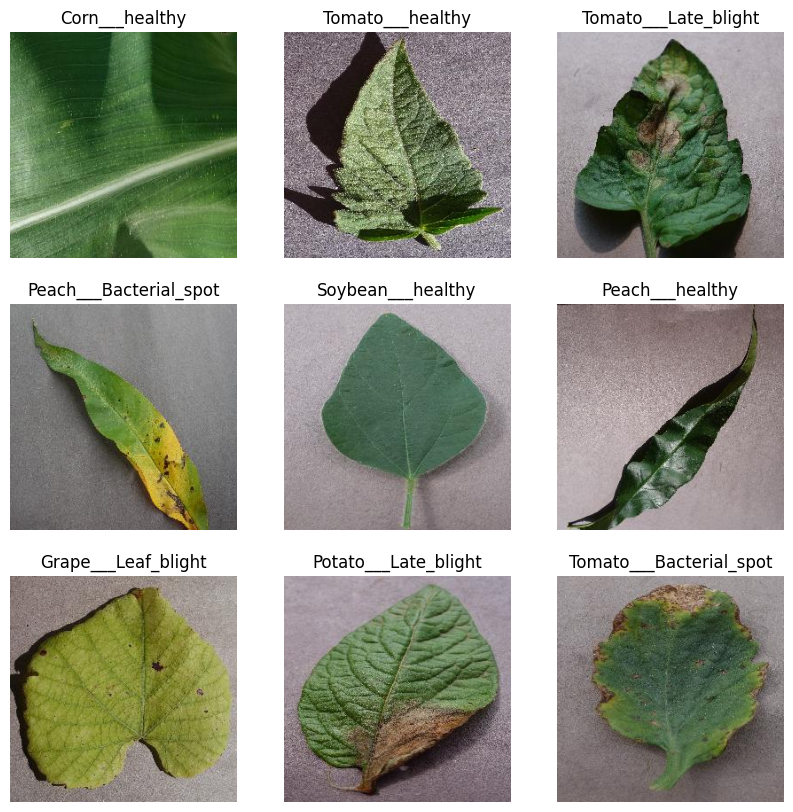

In [4]:


import matplotlib.pyplot as plt

# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Display some of the images
plt.figure(figsize=(10, 10))
for i in range(min(9, len(images))): # Display up to 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    # Optional: Get the class label
    class_index = tf.argmax(labels[i]).numpy()
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis('off')
plt.show()

In [ ]:


from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)), # Added another layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)), # Increased units
    BatchNormalization(),
    Dropout(0.5), # Added dropout
    Dense(train_generator.num_classes, activation='softmax')
])
# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Increased epochs
model.fit(train_generator, validation_data=val_generator, epochs=25) # Increased epochs further and added Batch Normalization and L2 regularization

In [ ]:

model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 94s 84ms/step - accuracy: 0.5169 - loss: 1.8062 - val_accuracy: 0.8221 - val_loss: 0.5909
Epoch 2/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.8746 - loss: 0.3916 - val_accuracy: 0.8826 - val_loss: 0.3860
Epoch 3/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 92s 84ms/step - accuracy: 0.9468 - loss: 0.1623 - val_accuracy: 0.8712 - val_loss: 0.4467
Epoch 4/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.9622 - loss: 0.1154 - val_accuracy: 0.8922 - val_loss: 0.4179
Epoch 5/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 93s 86ms/step - accuracy: 0.9783 - loss: 0.0677 - val_accuracy: 0.8838 - val_loss: 0.4984
Epoch 6/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.9825 - loss: 0.0595 - val_accuracy: 0.9001 - val_loss: 0.4436
Epoch 7/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 94s 86ms/step - accuracy: 0.9862 - loss: 0.0435 - val_accuracy: 0.8635 - val_loss: 0.6927
Epoch 8/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.9842 -

In [ ]:


# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('plant_disease_model_3.tflite', 'wb') as f:
    f.write(tflite_model)

print("TFLite model saved to plant_disease_model_2.tflite")

Saved artifact at '/tmp/tmp2bn3dkqo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  137690980465360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690980464400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690980463824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690980459216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690980464016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690980463248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690980455760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690980455184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690980464208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137690482279824: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model

In [ ]:

model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'), # Added another layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'), # Increased units
    Dropout(0.5), # Added dropout
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Increased epochs
model.fit(train_generator, validation_data=val_generator, epochs=15)

Epoch 1/15
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 107s 91ms/step - accuracy: 0.3540 - loss: 2.4437 - val_accuracy: 0.7875 - val_loss: 0.6868
Epoch 2/15
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 91s 84ms/step - accuracy: 0.7318 - loss: 0.8803 - val_accuracy: 0.8764 - val_loss: 0.4040
Epoch 3/15
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 92s 84ms/step - accuracy: 0.8149 - loss: 0.5913 - val_accuracy: 0.8714 - val_loss: 0.4152
Epoch 4/15
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 92s 84ms/step - accuracy: 0.8618 - loss: 0.4311 - val_accuracy: 0.9095 - val_loss: 0.2858
Epoch 5/15
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 92s 84ms/step - accuracy: 0.8874 - loss: 0.3487 - val_accuracy: 0.9179 - val_loss: 0.2725
Epoch 6/15
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 90s 83ms/step - accuracy: 0.9075 - loss: 0.2867 - val_accuracy: 0.9170 - val_loss: 0.2804
Epoch 7/15
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 93s 85ms/step - accuracy: 0.9204 - loss: 0.2388 - val_accuracy: 0.9271 - val_loss: 0.2406
Epoch 8/15
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 97s 90ms/step - accuracy: 0.9307 

In [5]:

model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'), # Added another layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'), # Increased units
    Dropout(0.5), # Added dropout
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Increased epochs
model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 200/1087 ━━━━━━━━━━━━━━━━━━━━ 1:08 78ms/step - accuracy: 0.1493 - loss: 3.3378

KeyboardInterrupt: 

In [6]:

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Training data generator
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
# Validation data generator
# Note: Validation data should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_generator = val_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
# Build CNN model with more layers and dropout
model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'), # Added layer
    MaxPooling2D((2, 2)), # Added pooling
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Added dropout
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add ModelCheckpoint and EarlyStopping callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20, # Increased epochs
    callbacks=[checkpoint, early_stopping]
)

Found 34756 images belonging to 38 classes.
Found 8673 images belonging to 38 classes.
Epoch 1/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.2385 - loss: 2.9047
Epoch 1: val_accuracy improved from -inf to 0.55575, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 557s 505ms/step - accuracy: 0.2385 - loss: 2.9044 - val_accuracy: 0.5557 - val_loss: 1.4998
Epoch 2/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.5147 - loss: 1.6898
Epoch 2: val_accuracy improved from 0.55575 to 0.68903, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 540s 497ms/step - accuracy: 0.5148 - loss: 1.6896 - val_accuracy: 0.6890 - val_loss: 1.0233
Epoch 3/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.6429 - loss: 1.1853
Epoch 3: val_accuracy improved from 0.68903 to 0.79246, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 541s 497ms/step - accuracy: 0.6429 - loss: 1.1852 - val_accuracy: 0.7925 - val_loss: 0.6661
Epoch 4/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.7072 - loss: 0.9435
Epoch 4: val_accuracy improved from 0.79246 to 0.82843, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 548s 504ms/step - accuracy: 0.7072 - loss: 0.9434 - val_accuracy: 0.8284 - val_loss: 0.5652
Epoch 5/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.7528 - loss: 0.7857
Epoch 5: val_accuracy improved from 0.82843 to 0.89254, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 539s 496ms/step - accuracy: 0.7528 - loss: 0.7857 - val_accuracy: 0.8925 - val_loss: 0.3593
Epoch 6/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.7887 - loss: 0.6697
Epoch 6: val_accuracy improved from 0.89254 to 0.90038, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 542s 498ms/step - accuracy: 0.7887 - loss: 0.6697 - val_accuracy: 0.9004 - val_loss: 0.3276
Epoch 7/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.8122 - loss: 0.5989
Epoch 7: val_accuracy improved from 0.90038 to 0.91710, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 546s 503ms/step - accuracy: 0.8122 - loss: 0.5989 - val_accuracy: 0.9171 - val_loss: 0.2798
Epoch 8/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.8274 - loss: 0.5425
Epoch 8: val_accuracy did not improve from 0.91710
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 540s 497ms/step - accuracy: 0.8274 - loss: 0.5425 - val_accuracy: 0.9061 - val_loss: 0.3232
Epoch 9/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.8383 - loss: 0.5016
Epoch 9: val_accuracy improved from 0.91710 to 0.93947, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 544s 500ms/step - accuracy: 0.8383 - loss: 0.5016 - val_accuracy: 0.9395 - val_loss: 0.2113
Epoch 10/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.8464 - loss: 0.4772
Epoch 10: val_accuracy did not improve from 0.93947
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 538s 495ms/step - accuracy: 0.8464 - loss: 0.4771 - val_accuracy: 0.9281 - val_loss: 0.2633
Epoch 11/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.8509 - loss: 0.4597
Epoch 11: val_accuracy did not improve from 0.93947
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 539s 496ms/step - accuracy: 0.8509 - loss: 0.4597 - val_accuracy: 0.9353 - val_loss: 0.2336
Epoch 12/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.8605 - loss: 0.4389
Epoch 12: val_accuracy did not improve from 0.93947
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 543s 500ms/step - accuracy: 0.8605 - loss: 0.4388 - val_accuracy: 0.9194 - val_loss: 0.2711
Epoch 13/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.8635 - l

1087/1087 ━━━━━━━━━━━━━━━━━━━━ 535s 492ms/step - accuracy: 0.8635 - loss: 0.4390 - val_accuracy: 0.9448 - val_loss: 0.1940
Epoch 14/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.8764 - loss: 0.3867
Epoch 14: val_accuracy did not improve from 0.94477
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 532s 489ms/step - accuracy: 0.8764 - loss: 0.3867 - val_accuracy: 0.9392 - val_loss: 0.2254
Epoch 15/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.8839 - loss: 0.3681
Epoch 15: val_accuracy did not improve from 0.94477
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 536s 493ms/step - accuracy: 0.8839 - loss: 0.3681 - val_accuracy: 0.9438 - val_loss: 0.2058
Epoch 16/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.8913 - loss: 0.3428
Epoch 16: val_accuracy did not improve from 0.94477
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 541s 497ms/step - accuracy: 0.8913 - loss: 0.3428 - val_accuracy: 0.9403 - val_loss: 0.2021
Epoch 17/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.8931 - l

1087/1087 ━━━━━━━━━━━━━━━━━━━━ 535s 492ms/step - accuracy: 0.8931 - loss: 0.3387 - val_accuracy: 0.9483 - val_loss: 0.1969
Epoch 18/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.8922 - loss: 0.3452
Epoch 18: val_accuracy did not improve from 0.94835
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 540s 497ms/step - accuracy: 0.8922 - loss: 0.3452 - val_accuracy: 0.9158 - val_loss: 0.3146
Epoch 19/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.8980 - loss: 0.3325
Epoch 19: val_accuracy did not improve from 0.94835
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 536s 493ms/step - accuracy: 0.8980 - loss: 0.3325 - val_accuracy: 0.9447 - val_loss: 0.1940
Epoch 20/20
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.9031 - loss: 0.3071
Epoch 20: val_accuracy improved from 0.94835 to 0.95838, saving model to best_model.h5


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 536s 493ms/step - accuracy: 0.9031 - loss: 0.3071 - val_accuracy: 0.9584 - val_loss: 0.1601
Restoring model weights from the end of the best epoch: 20.


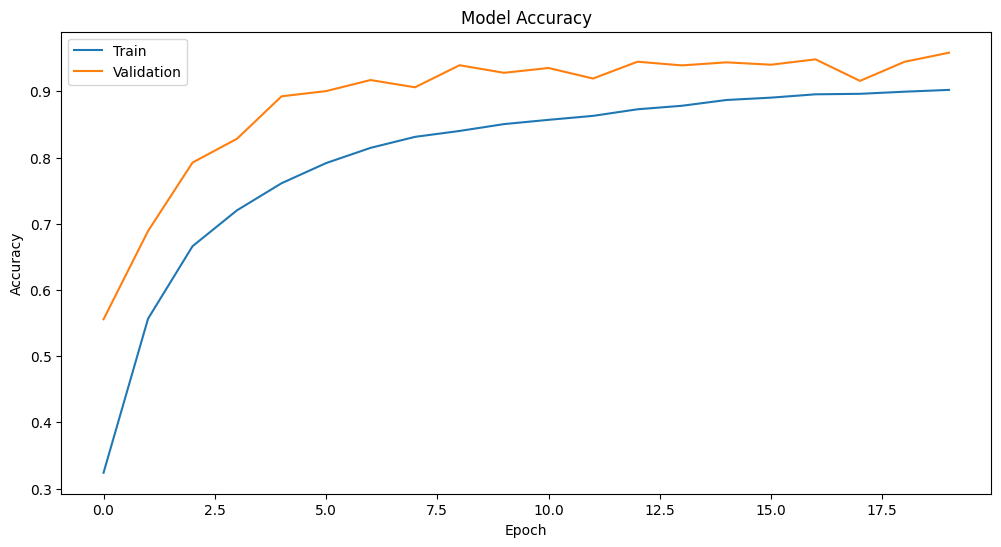

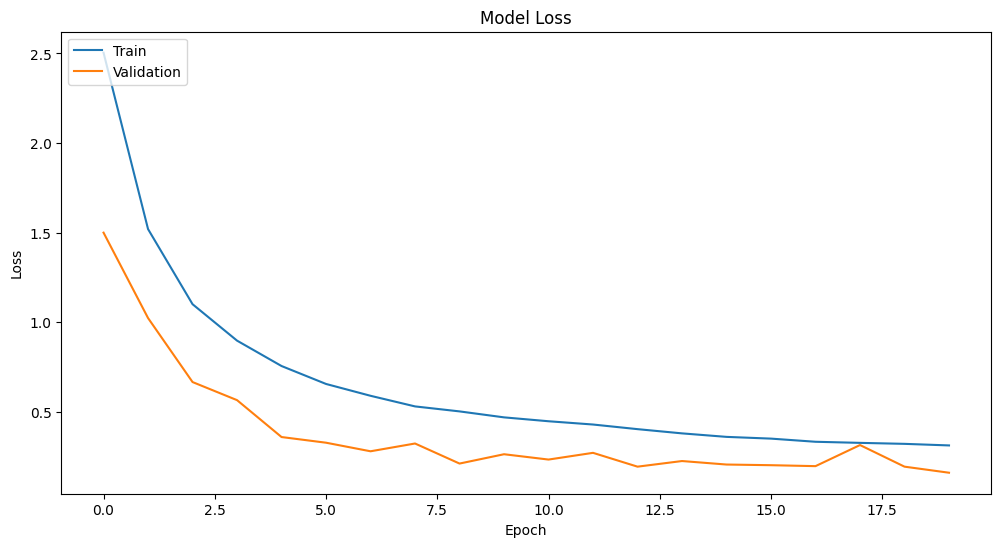

In [10]:


import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [7]:


# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('plant_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TFLite model saved to plant_disease_model.tflite")

Saved artifact at '/tmp/tmpknouzzyl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  140409898220624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409898220048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409898218512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409898220240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409462211216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409462212560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409462210832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409462213328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409462212752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140409462214096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1404094622

In [8]:

import os
import numpy as np
import pandas as pd
from PIL import Image

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="plant_disease_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare the test data
test_data_dir = 'plant_leave_diseases_test'
test_image_paths = []
for filename in os.listdir(test_data_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        test_image_paths.append(os.path.join(test_data_dir, filename))

# Get the class names from the training generator (assuming the same class order)
class_names = list(train_generator.class_indices.keys())

results = []

# Iterate through test images and make predictions
for image_path in test_image_paths:
    # Load and preprocess the image
    img = Image.open(image_path).resize(img_size)
    img_array = np.array(img, dtype=np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]

    # Set the tensor
    interpreter.set_tensor(input_details[0]['index'], img_array)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data)

    # Get the predicted class name
    predicted_class = class_names[prediction]

    # Extract the image ID (filename without extension)
    image_id = os.path.splitext(os.path.basename(image_path))[0]

    results.append({'ID': image_id, 'class': predicted_class})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")


Predictions saved to predictions.csv
